# 지하철 승하차 인원 분석 프로젝트

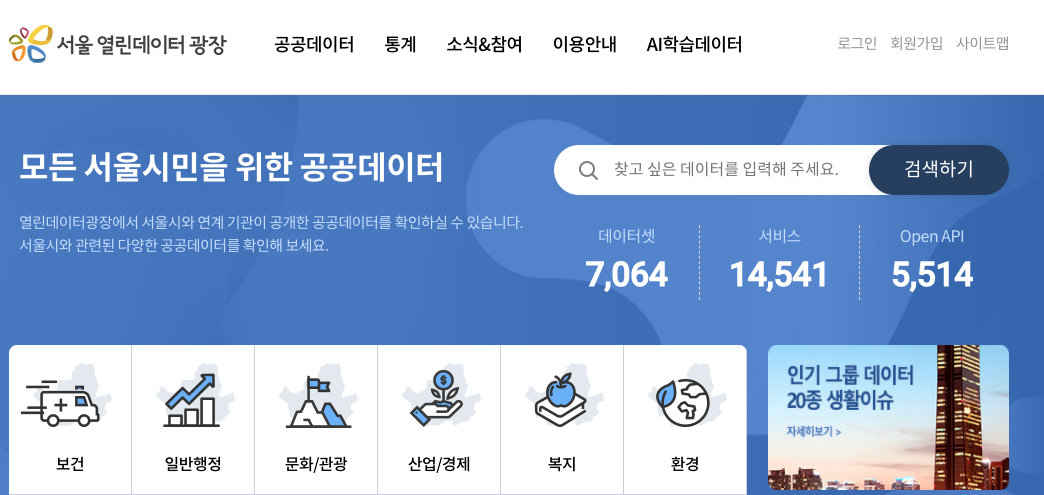

데이터 출처 : 서울 열린데이터 광장 (http://data.seoul.go.kr/)

프고젝트 목표 : 탐새적 데이터 분석을 수행하기 위한 데이터 젱제, 특성 엔지니어링, 시각화 방법 학습 

프로젝트 개요 : 
- 코로나 시국에 사람 많은 곳을 피하고 생각에 어떤 장소를 피해야 하는지 알아보고 싶을 때가 있음
- 이번 프로젝트는 지하철 호선별 승하차 인원 정보 데이터를 분석하고 지하철 역 위치 좌표 데이터를 활용해 특정 호선에서 어떤 역이 가장 혼잡한지 직관적으로 확인 할 것 

In [ ]:
# 데이터 읽기 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

metro = pd.read_csv("korean_subway.csv",encoding = 'cp949')
metro.head(5)

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202202,1호선,동대문,649,13,9562,1450,6553,4490,9865,...,5934,18,1028,0,0,0,0,0,0,20220303
1,202202,1호선,동묘앞,105,2,2051,668,2419,3514,4257,...,1713,6,862,0,0,0,0,0,0,20220303
2,202202,1호선,서울역,392,4,6620,4825,8866,28412,28159,...,5067,21,413,0,0,0,0,0,0,20220303
3,202202,1호선,시청,31,0,1418,4040,2260,15348,5038,...,835,3,78,0,0,0,0,0,0,20220303
4,202202,1호선,신설동,199,6,6030,1997,6341,8440,12565,...,3656,14,455,0,0,0,0,0,0,20220303


In [ ]:
# 승하차 인원 정보 데이터프레임 정보를 요약하여 출력
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50204 entries, 0 to 50203
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           50204 non-null  int64 
 1   호선명           50204 non-null  object
 2   지하철역          50204 non-null  object
 3   04시-05시 승차인원  50204 non-null  int64 
 4   04시-05시 하차인원  50204 non-null  int64 
 5   05시-06시 승차인원  50204 non-null  int64 
 6   05시-06시 하차인원  50204 non-null  int64 
 7   06시-07시 승차인원  50204 non-null  int64 
 8   06시-07시 하차인원  50204 non-null  int64 
 9   07시-08시 승차인원  50204 non-null  int64 
 10  07시-08시 하차인원  50204 non-null  int64 
 11  08시-09시 승차인원  50204 non-null  int64 
 12  08시-09시 하차인원  50204 non-null  int64 
 13  09시-10시 승차인원  50204 non-null  int64 
 14  09시-10시 하차인원  50204 non-null  int64 
 15  10시-11시 승차인원  50204 non-null  int64 
 16  10시-11시 하차인원  50204 non-null  int64 
 17  11시-12시 승차인원  50204 non-null  int64 
 18  11시-12시 하차인원  50204 non-null  int64 
 19  12시-

In [ ]:
#metro DataFrame 사용월 데이터 확인 
sorted(list(set(metro['사용월'])))

In [ ]:
#metro DataFrame 호선명 데이터 확인 
sorted(list(set(metro['호선명'])))

In [ ]:
#DataFrame 지하철 데이터 확인 
sorted(list(set(metro['지하철역'])))

In [ ]:
#DataFrame 지하철 데이터 개수 확인
len(list(set(metro['지하철역'])))

581

In [ ]:
# 최근 2월에 수집한 데이터만 추출하고 불필요한 컬럼 제거
metro_recent = metro[metro['사용월']==202202]
metro_recent

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202202,1호선,동대문,649,13,9562,1450,6553,4490,9865,...,5934,18,1028,0,0,0,0,0,0,20220303
1,202202,1호선,동묘앞,105,2,2051,668,2419,3514,4257,...,1713,6,862,0,0,0,0,0,0,20220303
2,202202,1호선,서울역,392,4,6620,4825,8866,28412,28159,...,5067,21,413,0,0,0,0,0,0,20220303
3,202202,1호선,시청,31,0,1418,4040,2260,15348,5038,...,835,3,78,0,0,0,0,0,0,20220303
4,202202,1호선,신설동,199,6,6030,1997,6341,8440,12565,...,3656,14,455,0,0,0,0,0,0,20220303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,202202,중앙선,원덕,36,1,216,4,426,60,483,...,173,1,7,0,0,0,0,0,0,20220303
604,202202,중앙선,중랑,88,0,4548,363,7420,1625,16891,...,2175,6,129,0,0,0,0,0,0,20220303
605,202202,중앙선,지평,0,0,0,0,0,0,199,...,0,0,0,0,0,0,0,0,0,20220303
606,202202,중앙선,팔당,0,0,132,37,380,392,807,...,177,1,0,0,0,0,0,0,0,20220303


In [ ]:
#불필요한 작업일자 컬럼 제거 
metro_recent = metro_recent.drop(columns={'작업일자'})
metro_recent.head(3)

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,202202,1호선,동대문,649,13,9562,1450,6553,4490,9865,...,1561,5934,18,1028,0,0,0,0,0,0
1,202202,1호선,동묘앞,105,2,2051,668,2419,3514,4257,...,598,1713,6,862,0,0,0,0,0,0
2,202202,1호선,서울역,392,4,6620,4825,8866,28412,28159,...,7907,5067,21,413,0,0,0,0,0,0


In [ ]:
# 한국어 설치 
!sudo apt-get install -y fonts-nanum 
!sudo fc-cache -fv 
!rm ~/.cache/matplotlib -rf

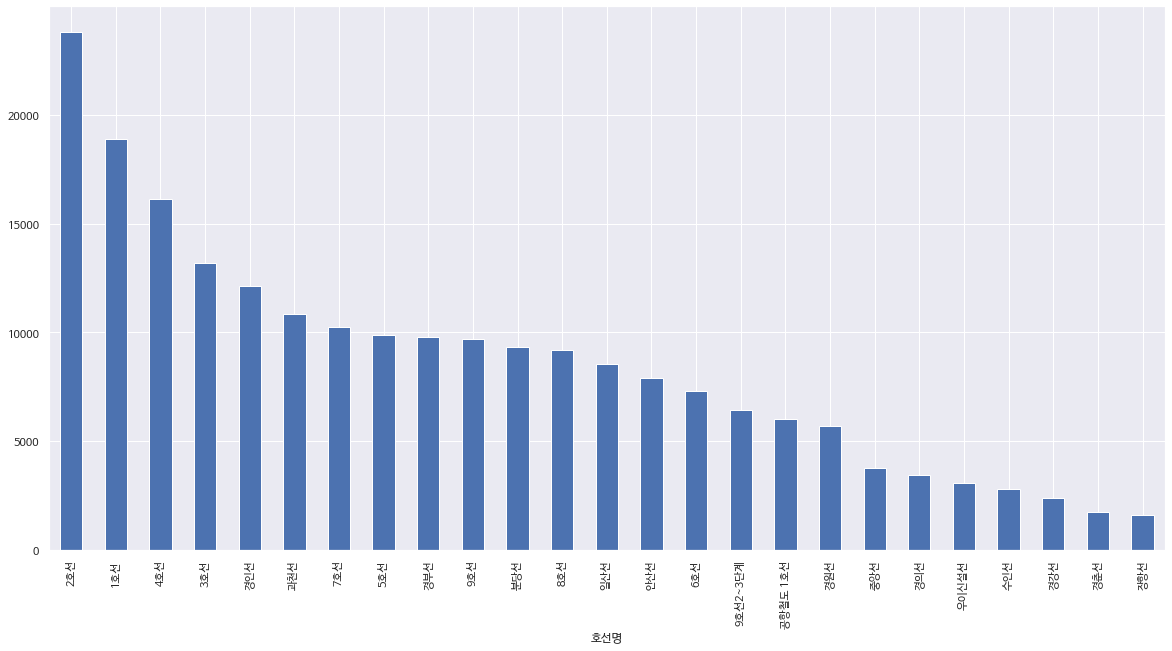

In [ ]:
# 호선 별 이용객 수 출력(데이터 시각화)
line = metro_recent.groupby(['호선명']).mean().reset_index()
line = line.drop(columns='사용월').set_index('호선명') #drop 선택하여 행,열을 삭제한 새로운 객체 
line = line.mean(axis=1).sort_values(ascending=False)

plt.figure(figsize=(20,10))
sns.set(font="NanumBarunGothic", rc = {"axes.unicode_minus":False})
line.plot(kind=('bar'))
plt.show()

In [ ]:
# 특정 호선에서 역별 평균 승하차 인원 데이터 추출 (데이터 시각화)
line = '2호선'
metro_st = metro_recent.groupby(['호선명','지하철역']).mean().reset_index()
metro_st_line2 = metro_st[metro_st['호선명']==line]
metro_st_line2

,호선명,지하철역,사용월,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
10,2호선,강남,202202.0,82.0,3.0,4508.0,9202.0,12339.0,40577.0,27756.0,...,14386.0,8089.0,5.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0
11,2호선,강변(동서울터미널),202202.0,13.0,0.0,6166.0,1451.0,18564.0,13126.0,57550.0,...,3182.0,7593.0,0.0,230.0,0.0,0.0,0.0,0.0,0.0,0.0
12,2호선,건대입구,202202.0,140.0,2.0,9749.0,1501.0,14677.0,16544.0,37125.0,...,5974.0,12166.0,11.0,1237.0,0.0,0.0,0.0,0.0,0.0,0.0
13,2호선,교대(법원.검찰청),202202.0,26.0,0.0,1930.0,5779.0,9559.0,18283.0,17539.0,...,4566.0,4420.0,1.0,27.0,2.0,2.0,0.0,0.0,0.0,0.0
14,2호선,구로디지털단지,202202.0,134.0,4.0,27995.0,3974.0,39812.0,17005.0,99710.0,...,4456.0,20103.0,1.0,54.0,0.0,2.0,1.0,0.0,0.0,0.0
15,2호선,구의(광진구청),202202.0,17.0,1.0,9876.0,828.0,19122.0,8659.0,48976.0,...,3284.0,9646.0,2.0,526.0,0.0,0.0,0.0,0.0,0.0,0.0
16,2호선,낙성대(강감찬),202202.0,17.0,0.0,8351.0,1414.0,19548.0,6869.0,57093.0,...,2983.0,13129.0,1.0,652.0,0.0,0.0,0.0,0.0,0.0,0.0
17,2호선,당산,202202.0,21.0,2.0,4658.0,1997.0,11985.0,9052.0,32795.0,...,2201.0,7404.0,1.0,129.0,0.0,0.0,0.0,0.0,0.0,0.0
18,2호선,대림(구로구청),202202.0,420.0,16.0,24180.0,2685.0,24553.0,8664.0,48212.0,...,2120.0,9951.0,2.0,265.0,1.0,0.0,0.0,0.0,0.0,0.0
19,2호선,도림천,202202.0,0.0,0.0,293.0,296.0,909.0,608.0,2497.0,...,99.0,430.0,1.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 승차 인원 컬럼만 추출 
get_on = pd.DataFrame()
get_on['지하철역'] = metro_st_line2['지하철역']
for i in range(int((len(metro_recent.columns)-3)/2)):
  get_on[metro_st_line2.columns[3+2*i]] = metro_st_line2[metro_st_line2.columns[3+2*i]]

get_on = get_on.set_index('지하철역')
get_on.head(4)

,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,11시-12시 승차인원,12시-13시 승차인원,13시-14시 승차인원,...,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
강남,82.0,4508.0,12339.0,27756.0,46964.0,38775.0,41870.0,57802.0,73983.0,88529.0,...,259909.0,162943.0,147897.0,196510.0,105602.0,14386.0,5.0,0.0,0.0,0.0
강변(동서울터미널),13.0,6166.0,18564.0,57550.0,82162.0,56828.0,41948.0,39500.0,39897.0,40911.0,...,46629.0,30702.0,25119.0,22171.0,11562.0,3182.0,0.0,0.0,0.0,0.0
건대입구,140.0,9749.0,14677.0,37125.0,71120.0,46656.0,27900.0,27473.0,32415.0,34642.0,...,66257.0,48981.0,63881.0,86336.0,41530.0,5974.0,11.0,0.0,0.0,0.0
교대(법원.검찰청),26.0,1930.0,9559.0,17539.0,25751.0,21110.0,20533.0,24744.0,28158.0,34436.0,...,112527.0,51296.0,43334.0,51491.0,25916.0,4566.0,1.0,2.0,0.0,0.0


In [ ]:
# 평균 승하차 인원을 구한 후 정수로 형 변환하여 데이터프레임으로 저장 
get_off = pd.DataFrame()
get_off['지하철역'] = metro_st_line2['지하철역']
for i in range(int((len(metro_recent.columns)-3)/2)):
  get_off[metro_st_line2.columns[4+2*i]] = metro_st_line2[metro_st_line2.columns[4+2*i]]

get_off = get_off.set_index('지하철역')
get_off

,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,...,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
강남,3.0,9202.0,40577.0,106237.0,244108.0,261797.0,123823.0,90945.0,93203.0,110634.0,...,131267.0,68263.0,33531.0,35066.0,21894.0,8089.0,23.0,0.0,0.0,0.0
강변(동서울터미널),0.0,1451.0,13126.0,16400.0,33984.0,28084.0,26884.0,26505.0,30066.0,32600.0,...,81625.0,58990.0,38981.0,41718.0,25933.0,7593.0,230.0,0.0,0.0,0.0
건대입구,2.0,1501.0,16544.0,19332.0,46176.0,38912.0,31069.0,34874.0,42624.0,48997.0,...,110637.0,67756.0,38510.0,47501.0,31433.0,12166.0,1237.0,0.0,0.0,0.0
교대(법원.검찰청),0.0,5779.0,18283.0,38795.0,120581.0,112728.0,53455.0,41101.0,38331.0,42593.0,...,51166.0,29983.0,17181.0,19837.0,13166.0,4420.0,27.0,2.0,0.0,0.0
구로디지털단지,4.0,3974.0,17005.0,64267.0,195503.0,107951.0,42937.0,35941.0,37290.0,47017.0,...,127178.0,98697.0,61255.0,77311.0,52662.0,20103.0,54.0,2.0,0.0,0.0
구의(광진구청),1.0,828.0,8659.0,11715.0,31851.0,19594.0,16108.0,16021.0,19248.0,21617.0,...,74545.0,52955.0,34192.0,40805.0,27308.0,9646.0,526.0,0.0,0.0,0.0
낙성대(강감찬),0.0,1414.0,6869.0,11785.0,28581.0,23717.0,19575.0,18840.0,22106.0,23312.0,...,78506.0,66604.0,43558.0,50857.0,37394.0,13129.0,652.0,0.0,0.0,0.0
당산,2.0,1997.0,9052.0,20231.0,55879.0,27720.0,14674.0,14082.0,15945.0,17329.0,...,53640.0,36575.0,23535.0,29250.0,17978.0,7404.0,129.0,0.0,0.0,0.0
대림(구로구청),16.0,2685.0,8664.0,16422.0,43517.0,26202.0,21861.0,23184.0,23407.0,25341.0,...,54731.0,41919.0,29494.0,45683.0,28861.0,9951.0,265.0,0.0,0.0,0.0


In [ ]:
df = pd.DataFrame(index=metro_st_line2['지하철역'])
df['평균 승차 인원 수'] = get_on.mean(axis=1).astype(int)
df['평균 하차 인원 수'] = get_off.mean(axis=1).astype(int)

df.head(5)


,평균 승차 인원 수,평균 하차 인원 수
지하철역,,
강남,75867,73772
강변(동서울터미널),28363,26527
건대입구,33280,35310
교대(법원.검찰청),28347,31676
구로디지털단지,51270,51320


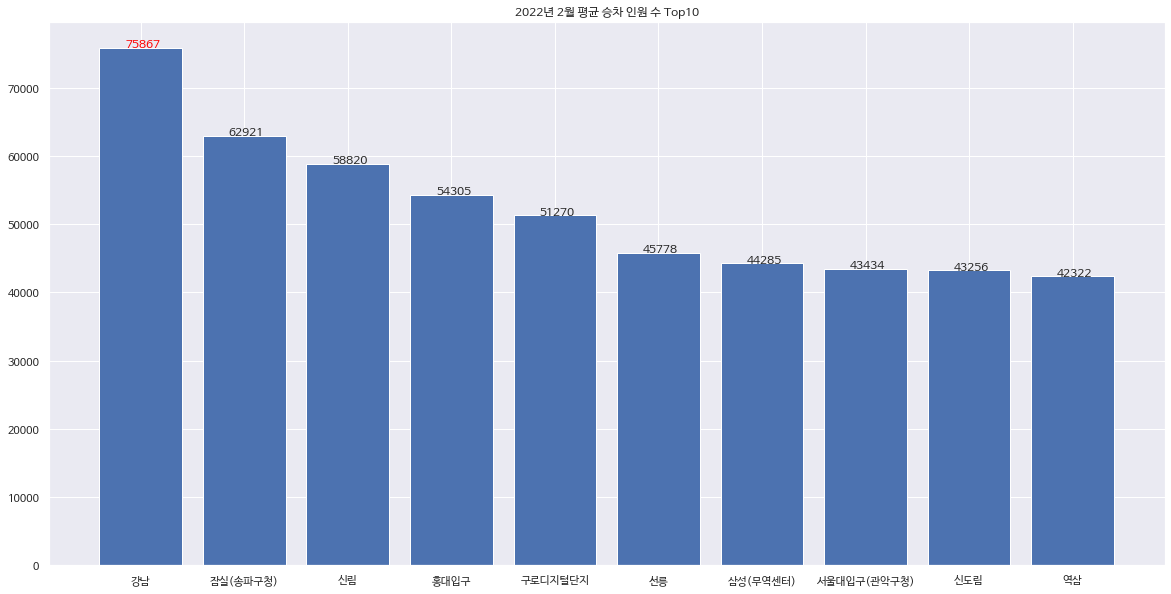

In [ ]:
#  평균 승하차 인원 수 내림차순 Top 10 

top10 = df.sort_values(by="평균 승차 인원 수", ascending=False).head(10)

plt.figure(figsize=(20,10))
sns.set(font="NanumBarunGothic", rc = {"axes.unicode_minus":False})

plt.bar(top10.index, top10['평균 승차 인원 수'])
for x,y in enumerate(list(top10['평균 승차 인원 수'])):
  if x == 0:
    plt.annotate(y,(x-0.15,y), color = 'red')
  else:
    plt.annotate(y,(x-0.15, y))

plt.title ('2022년 2월 평균 승차 인원 수 Top10')
plt.show()

# 특정 호선의 혼잡 정도와 위치좌표 데이터 병합 



In [ ]:
# 지하철 역별 위치좌표에 대한 데이터 불러오기 
file = "https://raw.githubusercontent.com/teddylee777/dip/main/assets/seoul_station_geocode.csv"

location = pd.read_csv(file)
location.head(10)

,호선,역명,lat,lng,주소,역번호
0,1,서울역,37.564119,126.976808,서울특별시 중구 세종대로 지하 2,150
1,1,시청,37.565704,126.976862,서울특별시 중구 세종대로 지하 101,151
2,1,종각,37.570169,126.983099,서울특별시 종로구 종로 지하 55,152
3,1,종로3가,37.570371,126.991005,서울특별시 종로구 종로 지하 129,153
4,1,종로5가,37.559785,126.970986,서울특별시 종로구 종로 지하 216,154
5,1,동대문,37.573029,127.015859,서울특별시 종로구 종로 지하 302,155
6,1,신설동,37.578118,127.034909,서울특별시 동대문구 왕산로 지하 1,156
7,1,제기동,37.578118,127.034909,서울특별시 동대문구 왕산로 지하 93,157
8,1,청량리,37.591038,127.040702,서울특별시 동대문구 왕산로 지하 205,158
9,1,동묘앞,37.573281,127.016649,서울특별시 종로구 종로 359,159


In [ ]:
import folium

# 특정 위도, 경도 중심으로 하는 OpenStreetMaP 출력 
latitude = 37.570169
longitude = 126.983099	

m = folium.Map (location=[latitude,longitude],
                zoom_start = 17,
                width = 750, 
                height= 500
                )
m

In [ ]:
#강남의 위도 및 경도 구하기 
station_name = '강남'
geo = list (location.loc[location['역명'] == station_name,['lat','lng']].iloc[0])
print(f'위도: {geo[0]}, 경도: {geo[1]}')

위도: 37.4977857, 경도: 127.027777


In [ ]:
#Map 출력 
gang = folium.Map(location= geo, 
                  zoom_start=17,
                  width = 750, 
                  height = 500,
                  )
folium.Marker(geo,
              popup = station_name,
              tooltip = f'{station_name} 정보').add_to(gang)

gang

In [ ]:
#'cartodbpositron' 타일로 설정 
gang = folium.Map(location= geo, 
                  zoom_start=17,
                  width = 750, 
                  height = 500,
                  tiles = 'cartodbpositron'
                  )

folium.Marker(geo,
              popup = station_name,
              tooltip = f'{station_name} 정보').add_to(gang)
gang

In [ ]:
# 특정 호선의 역별 평균 승하차 인원 수와 지하철 역 위치 좌표를 데이터프레임으로 반환하는 함수 
def get_nums_and_location (line,metro_st):
  #특정 호선의 데이터만 추출 
  metro_st_line2 = metro_st[metro_st['호선명']==line]

  #승차 인원 컬람만 추출 
  get_on = pd.DataFrame()
  get_on['지하철역'] = metro_st_line2['지하철역']
  for i in range(int((len(metro_recent.columns)-3)/2)):
    get_on[metro_st_line2.columns[3+2*i]] = metro_st_line2[metro_st_line2.columns[3+2*i]]
    
  get_on = get_on.set_index('지하철역')
  
  #하차 인원 컬럼만 추출 
  get_off = pd.DataFrame()
  get_off['지하철역'] = metro_st_line2['지하철역']
  for i in range(int((len(metro_recent.columns)-3)/2)):
    get_off[metro_st_line2.columns[4+2*i]] = metro_st_line2[metro_st_line2.columns[4+2*i]]
    
  get_off = get_off.set_index('지하철역')

  #역 별 평균 승하차 인원을 구한 후 정수로 형 변환하여 데이터프레임으로 저장 
  df = pd.DataFrame(index=metro_st_line2['지하철역'])
  df['평균 승차 인원 수'] = get_on.mean(axis=1).astype(int)
  df['평균 하차 인원 수'] = get_off.mean(axis=1).astype(int)


  df = df.reset_index()
   
  #지하철역 명을 기준으로 두 데이터프레임 병합 
  df = df.merge(location, left_on="지하철역", right_on = "역명")
  return df

In [ ]:
# 2호선 찾기 
rail = '2호선'
df = get_nums_and_location (rail,metro_st)
df.head(4)

,지하철역,평균 승차 인원 수,평균 하차 인원 수,호선,역명,lat,lng,주소,역번호
0,강남,75867,73772,2,강남,37.497786,127.027777,서울특별시 강남구 강남대로 지하 396,222
1,건대입구,33280,35310,2,건대입구,37.540749,127.069001,서울특별시 광진구 아차산로 243,212
2,구로디지털단지,51270,51320,2,구로디지털단지,37.485126,126.901529,서울특별시 구로구 도림천로 477,232
3,당산,15877,18177,2,당산,37.534931,126.902730,서울특별시 영등포구 당산로 229,237


In [ ]:
# 각 지하철 역의 위치별로 원형마커를 지도에 추가함
map = folium.Map(location = [37.529622,126.984307],zoom_start = 12)
for i in df.index:
  marker = folium.CircleMarker([df['lat'][i], df['lng'][i]],
                      radius = df['평균 승차 인원 수'][i]/3000,
                      popup = df['지하철역'][i],
                      color = '#3186cc',
                      fill_color = '#3186cc')
  marker.add_to(map)

map